# Определение перспективного тарифа для телеком компании

Оператор телеком пытается определить, на какой из тарифов сделать упор в продвижении.

В распоряжении данные 500 пользователей оператора телеком: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год, объем интернет трафика. 

Задача - на основе имеющихся данных провести исследовательский и статистический анализ. Выявить возможные закономерности.Проверить статистические гипотезы о различии средней выручки оператора от пользователей тарифов «Ультра» и «Смарт», и о различии средней выручки по жителям Москвы и других регионов.

## Содержание

1. [Предобработка данных.](#1)

2. [Расчет производных показателей.](#2)

3. [Исследовательский анализ данных.](#3)

4. [Проверка статистических гипотез.](#4)

5. [Выводы.](#5)

## 1. Предобработка данных. <a id=1></a>

### Знакомство с данными

In [153]:
# импортируем все, что пригодится
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [154]:
# забираем все датасеты
users_data = pd.read_csv('users.csv')
calls_data = pd.read_csv('calls.csv')
messages_data = pd.read_csv('messages.csv')
internet_data = pd.read_csv('internet.csv')
tariffs_data = pd.read_csv('tariffs.csv')

In [155]:
# Ознакомимся с данными пользователей
users_data.info()
display(users_data.head())
unique_clients = pd.DataFrame(users_data['user_id'].unique())
print('Уникальных клиентов:',unique_clients.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 19.6+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Уникальных клиентов: 500


In [156]:
# Ознакомимся с данными о звонках
calls_data.info()
display(calls_data.head())

unique_clients = pd.DataFrame(calls_data['user_id'].unique())
print('Уникальных клиентов:',unique_clients.shape[0])
# Видимо 8 клиентов из списка не пользуются телефоном для звонков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Уникальных клиентов: 492


> <span style = "color:Blue">  В calls явных пропусков нет, но нулевые звонки позднее обрежем, т.к. денег они не приносят, а средние значения будут размывать.</span>

In [157]:
# Ознакомимся с данными о сообщениях
messages_data.info()
display(messages_data.head())

unique_clients = pd.DataFrame(messages_data['user_id'].unique())
print('Уникальных клиентов:',unique_clients.shape[0])
# 74 клиента из списка не используют СМС

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Уникальных клиентов: 426


In [158]:
# Ознакомимся с данными интернет-трафика
internet_data.info()
display(internet_data.head(15))

unique_clients = pd.DataFrame(internet_data['user_id'].unique())
print('Уникальных клиентов:',unique_clients.shape[0])
# Тролько 3 клиента не используют интернет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Уникальных клиентов: 497


> <span style="color:Blue">
    <p>В сете интернет-трафика две проблемы: </p>        
    <p>- Лишний столбец дублирует индексы </p>  
    <p>- Тоже есть нулевые подключения(не приносят дохода, размывают параметры распределения)</p>
</span>

In [159]:
# Ознакомимся с данными о тарифах
tariffs_data.info()
tariffs_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 184.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Ликвидация пропусков

In [160]:
# Убираем звонки с нулевой продолжительностью
calls_data = calls_data.query('duration != 0')
calls_data.shape[0]
# Сет уменьшился почти на 40 тыс. строк

162994

In [161]:
# Убираем интернет соединения с нулевым трафиком
internet_data = internet_data.query('mb_used !=0')
internet_data.shape[0]
# Примерно на 19,6 тыс. строк меньше

129798

### Проверка дубликатов

In [162]:
print(users_data.duplicated().sum())
print(calls_data.duplicated().sum())
print(messages_data.duplicated().sum())
print(internet_data.duplicated().sum())
print(tariffs_data.duplicated().sum())
# Дубликатов не обнаружено

0
0
0
0
0


### Преобразование типов данных

In [163]:
# приведем даты в таблицах во временной формат
users_data['churn_date'] = pd.to_datetime(users_data['churn_date'], format='%Y-%m-%d')
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'], format='%Y-%m-%d')
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d')
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%d')
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d')


### Дополнительная предобработка

In [164]:
# уберем лишний столбец с индексами из internet_data
internet_data = internet_data[['id', 'mb_used', 'session_date', 'user_id']]
internet_data.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [165]:
# Округлим минуты вверх, раз так делает оператор
display(calls_data['duration'])
calls_data['duration'] = calls_data['duration'].apply(np.ceil)
calls_data['duration']

2          2.85
3         13.80
4          5.18
7         18.31
8         18.44
          ...  
202602     0.76
202603    18.83
202604    10.81
202605     4.27
202606    19.62
Name: duration, Length: 162994, dtype: float64

2          3.0
3         14.0
4          6.0
7         19.0
8         19.0
          ... 
202602     1.0
202603    19.0
202604    11.0
202605     5.0
202606    20.0
Name: duration, Length: 162994, dtype: float64

## 2. Расчет производных показателей. <a id=2></a>

In [166]:
# Для определения показателей каждого клиента по месяцам добавим в соответствующие таблицы...
#...колонку с  месяцем операции
calls_data['transaction_month'] = calls_data['call_date'].dt.month
messages_data['transaction_month'] = messages_data['message_date'].dt.month
internet_data['transaction_month'] = internet_data['session_date'].dt.month

# и сгруппируем по клиенту и месяцу
id_calls_data = calls_data.groupby(['user_id', 'transaction_month']).sum()
id_messages_data = messages_data.groupby(['user_id', 'transaction_month']).count()
id_internet_data = internet_data.groupby(['user_id', 'transaction_month']).sum()

# объединим в единую таблицу
id_full_data = id_calls_data.merge(
    id_messages_data["message_date"],
    how="outer",
    left_on=(["user_id", "transaction_month"]),
    right_on=(["user_id", "transaction_month"]),
).merge(
    id_internet_data["mb_used"],
    how="outer",
    left_on=(["user_id", "transaction_month"]),
    right_on=(["user_id", "transaction_month"]),
)

# при объединении, в столбцах услуг, которые данный клиент не использовал получилось значение NaN
# в действительности это то-же самое, что ноль потраченных минут, мегабайт, или смс
# так что заменим NaN на ноль 
id_full_data = id_full_data.fillna(0)

# назначим более понятные названия столбцов
id_full_data.columns = ['call_durations','message_counts','mb_used']

#добавим тариф
id_full_data = id_full_data.reset_index().merge(
    users_data[["user_id", "tariff"]], left_on="user_id", right_on="user_id"
)

id_full_data

,user_id,transaction_month,call_durations,message_counts,mb_used,tariff
0,1000,5,159.0,22.0,2253.49,ultra
1,1000,6,172.0,60.0,23233.77,ultra
2,1000,7,340.0,75.0,14003.64,ultra
3,1000,8,408.0,81.0,14055.93,ultra
4,1000,9,466.0,57.0,14568.91,ultra
...,...,...,...,...,...,...
3209,1489,8,0.0,17.0,11050.56,smart
3210,1489,9,0.0,32.0,17206.30,smart
3211,1489,10,0.0,21.0,19559.44,smart
3212,1489,11,0.0,20.0,17491.56,smart


In [167]:
# Чтобы дальше можно было считать колонками добавим так же данные тарифов
id_full_data = id_full_data.merge(tariffs_data, left_on='tariff', right_on='tariff_name')
#id_full_data
#получится лишняя колонка tariff_name, которую лучше сбросить
id_full_data.drop(('tariff_name'), axis='columns', inplace=True)
id_full_data

,user_id,transaction_month,call_durations,message_counts,mb_used,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,2253.49,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,60.0,23233.77,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,75.0,14003.64,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,81.0,14055.93,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,57.0,14568.91,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,17.0,11050.56,smart,50,15360,500,550,200,3,3
3210,1489,9,0.0,32.0,17206.30,smart,50,15360,500,550,200,3,3
3211,1489,10,0.0,21.0,19559.44,smart,50,15360,500,550,200,3,3
3212,1489,11,0.0,20.0,17491.56,smart,50,15360,500,550,200,3,3


In [168]:
# Дальше считаем колонками

# сверхлимитное время звонков
id_full_data['overlim_call_time'] = id_full_data['call_durations'] - id_full_data['minutes_included']
# если оно отрицательное, значит количество сверхлимитного времени равно нулю 
id_full_data.loc[id_full_data['overlim_call_time'] < 0,'overlim_call_time'] = 0
id_full_data['overlim_call_time']

# доходы оператора от сверхлимитных звонков
id_full_data['overlim_call_time_costs'] = id_full_data['overlim_call_time']*id_full_data['rub_per_minute']
id_full_data['overlim_call_time_costs']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3209    0.0
3210    0.0
3211    0.0
3212    0.0
3213    0.0
Name: overlim_call_time_costs, Length: 3214, dtype: float64

In [169]:
# сверхлимитные сообщения
id_full_data['overlim_messages'] = id_full_data['message_counts'] - id_full_data['messages_included']
# как и ранее, отрицательные значения - это ноль сверхлимитных сообщений
id_full_data.loc[id_full_data['overlim_messages'] < 0,'overlim_messages'] = 0
#id_full_data['overlim_messages']

# доходы оператора от сверхлимитных сообщений
id_full_data['overlim_messages_costs'] = id_full_data['overlim_messages']*id_full_data['rub_per_message']
id_full_data['overlim_messages_costs']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3209    0.0
3210    0.0
3211    0.0
3212    0.0
3213    0.0
Name: overlim_messages_costs, Length: 3214, dtype: float64

In [170]:
# сверхлимитный интернет
id_full_data['overlim_internet'] = id_full_data['mb_used'] - id_full_data['mb_per_month_included']
# как и ранее, отрицательные значения - это ноль сверхлимитных мегабайт
id_full_data.loc[id_full_data['overlim_internet'] < 0, 'overlim_internet'] = 0
id_full_data['overlim_internet']

# доходы оператора от сверхлимитного интернета
id_full_data['overlim_internet_costs'] = (id_full_data['overlim_internet']/1024)*id_full_data['rub_per_gb']
id_full_data['overlim_internet_costs'] 

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
           ...    
3209      0.000000
3210    360.605469
3211    820.203125
3212    416.320313
3213    383.302734
Name: overlim_internet_costs, Length: 3214, dtype: float64

In [171]:
# совокупный доход
id_full_data['full_costs'] = (
    id_full_data['overlim_call_time_costs'] 
    + id_full_data['overlim_messages_costs'] 
    + id_full_data['overlim_internet_costs']
    + id_full_data['rub_monthly_fee']
)
display(id_full_data['full_costs'])
print('Наиболее частые значения выручки:\n', id_full_data['full_costs'].value_counts())

0       1950.000000
1       1950.000000
2       1950.000000
3       1950.000000
4       1950.000000
           ...     
3209     550.000000
3210     910.605469
3211    1370.203125
3212     966.320313
3213     933.302734
Name: full_costs, Length: 3214, dtype: float64

Наиболее частые значения выручки:
 1950.000000    851
550.000000     567
589.000000       7
592.000000       6
604.000000       6
              ... 
2581.513672      1
2538.468750      1
2066.498047      1
1728.033203      1
865.990234       1
Name: full_costs, Length: 1612, dtype: int64


> <span style='color:Blue'>Самые распространенные значения выручки на одного клиента в месяц соответствуют размерам абонентской платы. Т.е. большое количество клиентов укладывается в ограничения тарифов.</span>

## 3. Исследовательский анализ данных. <a id=3></a>

### Описание распределний. 

In [172]:
# Сколько минут разговора, требуется пользователям каждого тарифа в месяц?
print('Сравнение распределений длительности звонков в месяц(мин.)')
smart_descr = pd.DataFrame(id_full_data.query('tariff == "smart"')['call_durations'].describe()).reset_index()
ultra_descr = pd.DataFrame(id_full_data.query('tariff == "ultra"')['call_durations'].describe()).reset_index()
duration_comparison = smart_descr.merge(ultra_descr, how='outer', left_on='index',right_on='index' )
duration_comparison.columns=['metrics', 'smart_duration', 'ultra_duration']
display(duration_comparison)
variance_estimate_smart = np.var(id_full_data.query('tariff == "smart"')['call_durations'], ddof=1)
variance_estimate_ultra = np.var(id_full_data.query('tariff == "ultra"')['call_durations'], ddof=1)

print('Дисперсия времени звонков в месяц по smart: {:.2f}'.format(variance_estimate_smart))
print('Дисперсия времени звонков в месяц по ultra: {:.2f}'.format(variance_estimate_ultra))

Сравнение распределений длительности звонков в месяц(мин.)


,metrics,smart_duration,ultra_duration
0,count,2229.000000,985.000000
1,mean,417.934948,526.623350
2,std,190.313730,317.606098
3,min,0.000000,0.000000
4,25%,282.000000,284.000000
5,50%,422.000000,518.000000
6,75%,545.000000,752.000000
7,max,1435.000000,1673.000000


Дисперсия времени звонков в месяц по smart: 36219.32
Дисперсия времени звонков в месяц по ultra: 100873.63


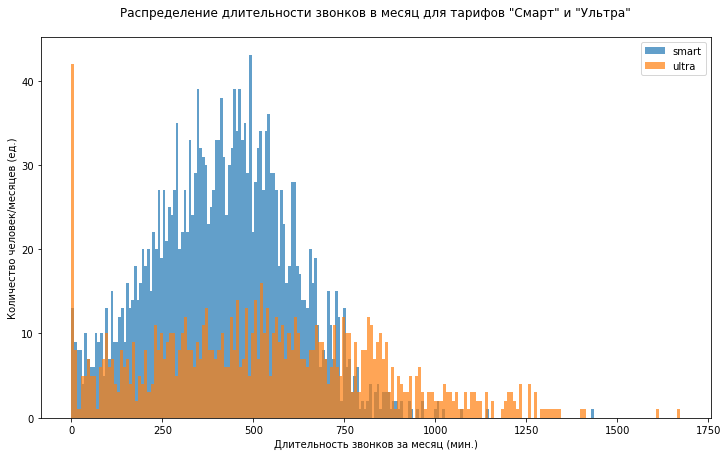

In [173]:
# Визуализация распределения длительности звонков в месяц
fig, ax = plt.subplots()
ax.hist(id_full_data.query('tariff == "smart"')['call_durations'],bins=200, alpha=0.7, label='smart')
ax.hist(id_full_data.query('tariff == "ultra"')['call_durations'],bins=200, alpha=0.7, label='ultra')
fig.set_figwidth(12)
fig.set_figheight(7)
ax.set_xlabel('Длительность звонков за месяц (мин.)')
ax.set_ylabel('Количество человек/месяцев (ед.)')
plt.title('Распределение длительности звонков в месяц для тарифов "Смарт" и "Ультра"\n')
plt.legend()
plt.show()

> <span style='color:Blue'> Распределение для клиентов тарифа smart при звонках более плотное, стандартное отклонение значительно меньше. Это говорит о большей однородности поведения абонантов. </span>
> <p><span style='color:Blue'> В то же время, поведение клиентов тарифа ultra разнородно. Некоторые из них (в нескольео раз больше чем на smart) вообще не использовали тариф для телефонной связи. Значимое количество разговаривало более 1000 минут в месяц.  </span></p>
> <p><span style='color:Blue'> В среднем владельцы ultra более активно используют телефонную связь.  </span></p>

In [174]:
# Cколько сообщений требуется пользователям каждого тарифа в месяц? 
print('Сравнение распределений количества сообщений в месяц(шт.)')
smart_descr = pd.DataFrame(id_full_data.query('tariff == "smart"')['message_counts'].describe()).reset_index()
ultra_descr = pd.DataFrame(id_full_data.query('tariff == "ultra"')['message_counts'].describe()).reset_index()
duration_comparison = smart_descr.merge(ultra_descr, how='outer', left_on='index',right_on='index' )
duration_comparison.columns=['metrics', 'smart_messages', 'ultra_messages']
display(duration_comparison)
variance_estimate_smart = np.var(id_full_data.query('tariff == "smart"')['message_counts'], ddof=1)
variance_estimate_ultra = np.var(id_full_data.query('tariff == "ultra"')['message_counts'], ddof=1)

print('Дисперсия количества сообщений в месяц по smart: {:.2f}'.format(variance_estimate_smart))
print('Дисперсия количества сообщений в месяц по ultra: {:.2f}'.format(variance_estimate_ultra))

Сравнение распределений количества сообщений в месяц(шт.)


,metrics,smart_messages,ultra_messages
0,count,2229.000000,985.000000
1,mean,33.384029,49.363452
2,std,28.227876,47.804457
3,min,0.000000,0.000000
4,25%,10.000000,6.000000
5,50%,28.000000,38.000000
6,75%,51.000000,79.000000
7,max,143.000000,224.000000


Дисперсия количества сообщений в месяц по smart: 796.81
Дисперсия количества сообщений в месяц по ultra: 2285.27


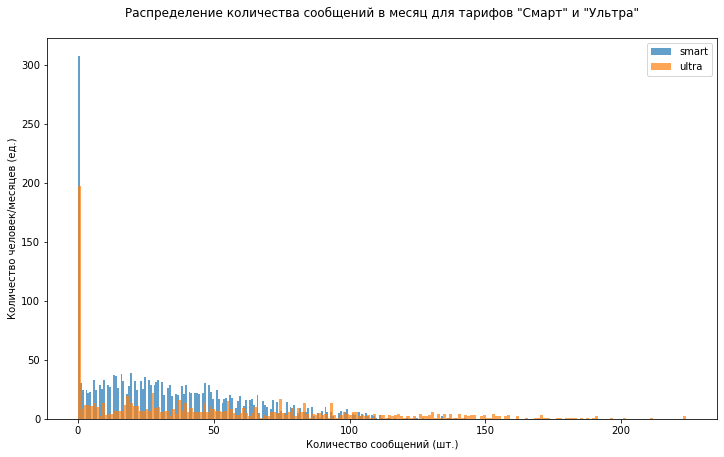

0.0     307
20.0     39
16.0     38
Name: message_counts, dtype: int64
0.0     190
6.0      13
20.0     13
Name: message_counts, dtype: int64


In [175]:
# Визуализация распределения количества сообщений в месяц
fig, ax = plt.subplots()
ax.hist(id_full_data.query('tariff == "smart"')['message_counts'],bins=200, alpha=0.7, label='smart')
ax.hist(id_full_data.query('tariff == "ultra"')['message_counts'],bins=200, alpha=0.7, label='ultra')
fig.set_figwidth(12)
fig.set_figheight(7)
ax.set_xlabel('Количество сообщений (шт.)')
ax.set_ylabel('Количество человек/месяцев (ед.)')
plt.title('Распределение количества сообщений в месяц для тарифов "Смарт" и "Ультра"\n')
plt.legend()
plt.show()

# Самые частые значения
print(id_full_data.query('tariff == "smart"')['message_counts'].value_counts().head(3))
print(id_full_data.query('tariff == "ultra"')['message_counts'].value_counts().head(3))

> <span style='color:Blue'> Распределение использования сообщений похоже на аналогичное по звонкам в смысле большей однородности по тарифу smart.  </span>
> <p><span style='color:Blue'> Различие заключается в том, что большее абсолютное количество человек/месяцев без использования сообщений(307) наблюдается на тарифе smart (в отличие от звонков) </span></p>
> <p><span style='color:Blue'> В среднем владельцы ultra более активно используют сообщения, но стоит отметить, что по обоим тарифам наблюдается большой процент неиспользования услуги: 14% по smart  и 19% по ultra.  </span></p>

In [176]:
# какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
print('Сравнение распределений использованного интернет-трафика в месяц(Мб.)')
smart_descr = pd.DataFrame(id_full_data.query('tariff == "smart"')['mb_used'].describe()).reset_index()
ultra_descr = pd.DataFrame(id_full_data.query('tariff == "ultra"')['mb_used'].describe()).reset_index()
duration_comparison = smart_descr.merge(ultra_descr, how='outer', left_on='index',right_on='index' )
duration_comparison.columns=['metrics', 'smart_mb', 'ultra_mb']
display(duration_comparison)
variance_estimate_smart = np.var(id_full_data.query('tariff == "smart"')['mb_used'], ddof=1)
variance_estimate_ultra = np.var(id_full_data.query('tariff == "ultra"')['mb_used'], ddof=1)

print('Дисперсия использованного трафика в месяц по smart: {:.2f}'.format(variance_estimate_smart))
print('Дисперсия использованного трафика в месяц по ultra: {:.2f}'.format(variance_estimate_ultra))

Сравнение распределений использованного интернет-трафика в месяц(Мб.)


,metrics,smart_mb,ultra_mb
0,count,2229.000000,985.000000
1,mean,16208.386990,19468.805208
2,std,5870.476681,10087.170752
3,min,0.000000,0.000000
4,25%,12643.010000,11770.260000
5,50%,16506.840000,19308.010000
6,75%,20042.930000,26837.690000
7,max,38552.450000,49745.690000


Дисперсия использованного трафика в месяц по smart: 34462496.46
Дисперсия использованного трафика в месяц по ultra: 101751013.78


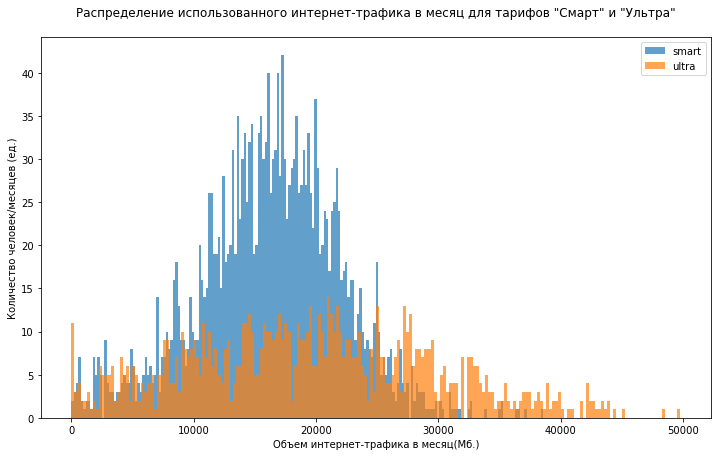

0.00        2
17305.54    1
2305.73     1
Name: mb_used, dtype: int64
0.00        11
24550.03     1
8152.07      1
Name: mb_used, dtype: int64


In [177]:
#Визуализация распределения использованного интернет-трафика в месяц
fig, ax = plt.subplots()
ax.hist(id_full_data.query('tariff == "smart"')['mb_used'],bins=200, alpha=0.7, label='smart')
ax.hist(id_full_data.query('tariff == "ultra"')['mb_used'],bins=200, alpha=0.7, label='ultra')
fig.set_figwidth(12)
fig.set_figheight(7)
ax.set_xlabel('Объем интернет-трафика в месяц(Мб.)')
ax.set_ylabel('Количество человек/месяцев (ед.)')
plt.title('Распределение использованного интернет-трафика в месяц для тарифов "Смарт" и "Ультра"\n')
plt.legend()
plt.show()
print(id_full_data.query('tariff == "smart"')['mb_used'].value_counts().head(3))
print(id_full_data.query('tariff == "ultra"')['mb_used'].value_counts().head(3))


> <p><span style='color:Blue'> Очевидно интернет является наиболее востребованной услугой. т.к. количество человек/месяцев в которые не использовался интернет для обоих тарифов минимально. </span></p>
> <p><span style='color:Blue'> В среднем владельцы ultra более активно используют интернет, и снова подтверждают свою разнородность меньшей плотностью распределения.  </span></p>

count    2229.000000
mean     1230.442346
std       785.720816
min       550.000000
25%       550.000000
50%       957.978516
75%      1665.488281
max      6699.775391
Name: full_costs, dtype: float64

567

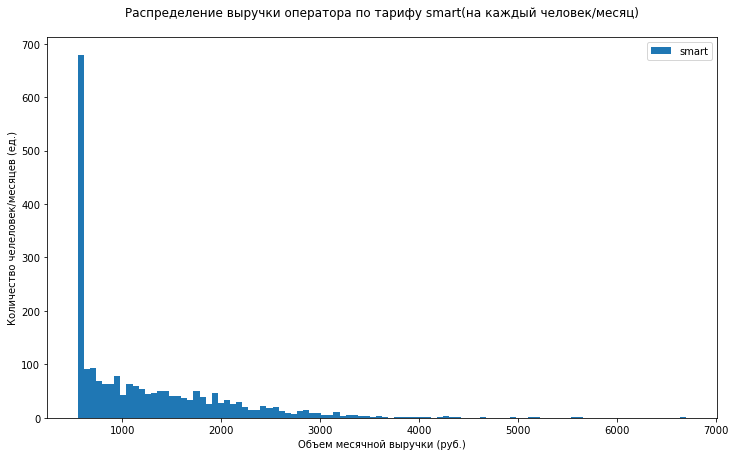

In [178]:
# Опишем распределение выручки оператора по тарифу smart(на каждый человек/месяц)
display(id_full_data[id_full_data['tariff'] == 'smart']['full_costs'].describe())

# сколько человек/месяцев уложились в тариф
display(id_full_data.query('tariff == "smart" and full_costs == 550').shape[0])

# построим гистограмму распределения
fig, ax = plt.subplots()
ax.hist(id_full_data[id_full_data['tariff'] == 'smart']['full_costs'],bins=100, label='smart')
fig.set_figwidth(12)
fig.set_figheight(7)
ax.set_xlabel('Объем месячной выручки (руб.)')
ax.set_ylabel('Количество челеловек/месяцев (ед.)')
plt.title('Распределение выручки оператора по тарифу smart(на каждый человек/месяц)\n')
plt.legend()
plt.show()

> <span style='color:Blue'> Имеем 2229 человек/месяцев. Хотя многие из них(567) уложились в стоимость абонентской платы 550 руб/мес, оставшиеся сдвинули среднее значение стоимости тарифа к 1230 руб./мес., и даже медианное к 958 руб./мес.  </span>
  <p> Тогда каждый 1% человеко/месяцев в текущей выборке приносит доход в диапазоне от:</p> 
  <p>2229 *0.01 * 957 =  21331 руб ориентируясь на медианное значение стоимости месяца</p>
  <p> до 2229 *0.01 * 1230 =  27417 руб  ориентируясь на среднее значение стоимости месяца</p>


count     985.000000
mean     2059.868918
std       354.880790
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4736.966309
Name: full_costs, dtype: float64

851

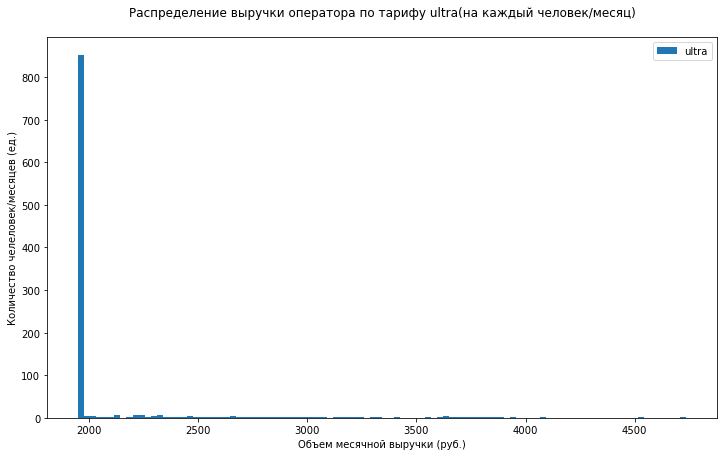

In [179]:
# опишем распределение выручки оператора по тарифу ultra (на каждый человек/месяц)
display(id_full_data[id_full_data['tariff'] == 'ultra']['full_costs'].describe())

# сколько человек/месяцев уложились в тариф
display(id_full_data.query('tariff == "ultra" and full_costs == 1950').shape[0])

# построим гистограмму распределения
fig, ax = plt.subplots()
ax.hist(id_full_data[id_full_data['tariff'] == 'ultra']['full_costs'],bins=100, label='ultra')
fig.set_figwidth(12)
fig.set_figheight(7)
ax.set_xlabel('Объем месячной выручки (руб.)')
ax.set_ylabel('Количество челеловек/месяцев (ед.)')
plt.title('Распределение выручки оператора по тарифу ultra(на каждый человек/месяц)\n')
plt.legend()
plt.show()

> <span style='color:Blue'> Имеем 985 человек/месяцев. Подавляющее большинство из них(851) уложились в стоимость абонентской платы 1950 руб./мес., благодаря чему медианная стоимость месяца оказалась равна абонентской плате. Оставшиеся немного сдвинули среднее значение стоимости тарифа к 2059 руб./мес.  </span>
 <p> Тогда каждый 1% человеко/месяцев в текущей выборке приносит доход в диапазоне от:</p> 
 <p> 985 *0.01 * 1950 =  19207 руб ориентируясь на медианное значение стоимости месяца</p>
 <p> до 985 *0.01 * 2059 =  20281 руб  ориентируясь на среднее значение стоимости месяца</p>


### Общий вывод исследовательского анализа
Если предположить, что: 
<p> - распределение человеко/месяцев в выборке примерно соответствует их распределению в генеральной савокупности(это предмет для уточнения с заказчиком, допустимо просто сравнить распределение клиентов между тарифами в генеральной совокупности и в выборке),</p> 
<p> - а воздействие рекламы будет вызывать пропорциональное увеличение человек/месяцев в тарифе от их текущего количества,</p>
<p>тогда тариф smart выглядит более привлекательно, т.к. в расчете на 1% человек/месяцев приносит больший доход </p>
<p>Эта логика основана на том, что количество клиентов 'массового' тарифа больше чем клиентов 'премиального' по объективным причинам разного размера сегментов рынка. А значит ожидать одинакового эффекта рекламы в абсолютных величинах(количество клиентов) для разных тарифов не стоит. </p>
<p>Если же распределение клиентов/(человек/месяцев) в генеральной савокупности отличается, или есть основания предполагать(по опыту), что один из тарифов вызовет больший рекламный отклик, то необходимо делать поправки на эти факторы.</p>

## 4. Проверка статистических гипотез. <a id=4></a>

### Гипотеза №1.
### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Сформулируем подробнее нулевую и альтрнативную гипотезы.

H0: равенство средних значений двух генеральных совокупностей:        
<p>- совокупности выручки по клиентам smart(в месяц)</p>
<p>- совокупности выручки по клиентам ultra(в месяц)</p> 

Н1: Средняя выручка в генеральных совокупностях пользователей тарифов «Ультра» и «Смарт» различается

In [180]:
# определим выборки данных 
smart_costs_data = id_full_data[id_full_data['tariff'] == 'smart']['full_costs']
ultra_costs_data = id_full_data[id_full_data['tariff'] == 'ultra']['full_costs']

# определим значимость и проверим гипотезу
alpha = .05 # раз речь не о жизни или смерти, то 5% допустимый уровень риска ошибки

# опыт аналитического исследования показал значительную разницу дисперсий
# по этому параметр equal_var=False
results = st.ttest_ind(smart_costs_data, ultra_costs_data,  equal_var=False)

print('Статистическая значимость разницы между средними значениями выручки:',results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем гипотезу о различии средней выручки')
else:
    print('Принимаем гипотезу о различии средней выручки')


Статистическая значимость разницы между средними значениями выручки: 1.6264184497198272e-298
Отвергаем гипотезу о различии средней выручки


> <span style='color:Blue'> Раз гипотеза о различии средней выручки по тарифам отвергнута, то мы не можем утверждать, что в генеральной совокупности клиентов Мегалайн есть разница между средней выручкой клиентов тарифа smart и ultra.</span>

### Гипотеза №2
### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нулевой гипотезой в данном случае будет равенство средних значений двух генеральных совокупностей:        
<p>- совокупности выручки по клиентам из Москвы(в месяц)</p>
<p>- совокупности выручки по клиентам всех городов кроме Москвы(в месяц)</p> 

In [181]:
# Чтобы сформировать выборки добавим к  таблице id_full_data данные о городе проживания пользователя из users_data
id_full_data = id_full_data.merge(users_data[['user_id', 'city']], left_on='user_id', right_on='user_id')
id_full_data['city'].head(3)


0    Краснодар
1    Краснодар
2    Краснодар
Name: city, dtype: object

In [182]:
# сгруппируем выборки
moscow_costs_data = id_full_data[id_full_data['city'] == 'Москва']['full_costs']
other_cities_costs_data = id_full_data[id_full_data['city'] != 'Москва']['full_costs']

# определим значимость и проверим гипотезу
alpha = .05 # раз речь не о жизни или смерти, то 5% допустимый уровень риска ошибки

results = st.ttest_ind(moscow_costs_data, other_cities_costs_data)

print('Статистическая значимость разницы между средними значениями выручки:',results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем гипотезу о различии средней выручки')
else:
    print('Принимаем гипотезу о различии средней выручки')


Статистическая значимость разницы между средними значениями выручки: 0.4698464699962491
Принимаем гипотезу о различии средней выручки


> <span style='color:Blue'>Очевидно, в генеральной савокупности действительно есть разница между средней выручкой клиентов Москвы и других городов, т.к. значимость отклонения между средними выборок очень велика.</span>

## 5. Выводы. <a id=5></a>

В итоге имеем следующие существенные факты:
1. Хотя по данным выборки средняя выручка по тарифу ultra больше, мы не смогли подтвердить гипотезу о том, что средняя месячная выручка на клиента различается по тарифам в генеральной совокупности.
2. При условии подтверждения клиентом соответствия распределения абонентов между тарифами в выборке и генеральной совокупности, тариф smart предпочтительнее, т.к. на 1% аудитории этого тарифа приходится большая выручка(сама аудитория больше).
В этих обстоятельствах рекламные усилия более целесообразно направить на тариф smart.

P.S. При дальнейшем исследовании можно было бы обратить внимание на различия в средней выручке тарифа в городах с разным населением и рассмотреть возможности таргетированной рекламы в зависимости от города.
